In [18]:
########## merge 2 datasets ##########
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy as sp

# open the csv file.
apple = pd.read_csv('EOD-AAPL.csv')
# add a col for all rows
apple['Company'] = 'Apple'
# move the company col to first: change the col order
cols = apple.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
apple = apple[cols]
# open another csv file
msft = pd.read_csv('EOD-MSFT.csv')
# add the column to MSFT, and change the order
msft['Company'] = 'Microsoft'
cols2 = msft.columns.tolist()
cols2 = cols2[-1:] + cols2[:-1]
cols2
msft = msft[cols2]
# merge two dataset tpgether.
df = pd.concat([apple, msft])
# keep 10 variables out of 14
df = df[['Company','Date','Open','Close','Adj_Open','Adj_Close']]
# convert the datatype into data
df['Date']= pd.to_datetime(df['Date'])
df.head()
# df.tail()

,Company,Date,Open,Close,Adj_Open,Adj_Close
1085,Microsoft,2013-09-09,31.2208,31.655,27.173278,27.551188
1086,Microsoft,2013-09-06,31.3100,31.152,27.250914,27.113398
1087,Microsoft,2013-09-05,31.1000,31.235,27.068139,27.185637
1088,Microsoft,2013-09-04,31.3900,31.195,27.320543,27.150823
1089,Microsoft,2013-09-03,31.7500,31.880,27.633872,27.747018


In [19]:
############### STAT DESCRIBE ##############
df.describe()

,Open,Close,Adj_Open,Adj_Close
count,2180.000000,2180.000000,2180.000000,2180.000000
mean,123.574642,123.615241,77.603603,77.630069
std,134.195753,134.250548,35.715245,35.715136
min,31.100000,31.152000,27.068139,27.113398
25%,49.542500,49.690000,46.061047,46.294573
50%,88.560000,88.565000,69.519757,69.512354
75%,121.542500,121.692500,104.011855,104.042023
max,649.900000,647.350000,169.960338,171.231813


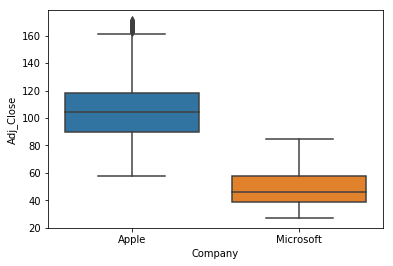

In [20]:
############## BIXPLOT ##############
#%matplotlib inline #Show graphs within Python notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Company'],y=df['Adj_Close'], data=df)

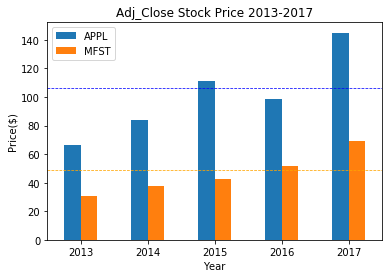

In [21]:
############## BAR CHART ##############
# get Apple's data
APLE = df[df['Company']=='Apple']
# get data of 2013
APLE_2013 = APLE[APLE['Date']<'2014-01-01']
y1 = APLE_2013['Adj_Close'].mean()
# get data of 2014
APLE_2014 = APLE[(APLE['Date'] >= '2014-01-01') & (APLE['Date'] < '2015-01-01')]
y2 = APLE_2014['Adj_Close'].mean()
# get data of 2015
APLE_2015 = APLE[(APLE['Date'] >= '2015-01-01') & (APLE['Date'] < '2016-01-01')]
y3 = APLE_2015['Adj_Close'].mean()
# get data of 2016
APLE_2016 = APLE[(APLE['Date'] >= '2016-01-01') & (APLE['Date'] < '2017-01-01')]
y4 = APLE_2016['Adj_Close'].mean()
# get data of 2017
APLE_2017 = APLE[APLE['Date'] >= '2017-01-01']
y5 = APLE_2017['Adj_Close'].mean()
# set up the values for apple's y axies
y_a = [y1, y2, y3, y4, y5]
# get MSFT's data
MSFT = df[df['Company']=='Microsoft']
# get data of 2013
MSFT_2013 = MSFT[MSFT['Date']<'2014-01-01']
y6 = MSFT_2013['Adj_Close'].mean()
# get data of 2014
MSFT_2014 = MSFT[(MSFT['Date'] >= '2014-01-01') & (MSFT['Date'] < '2015-01-01')]
y7 = MSFT_2014['Adj_Close'].mean()
# get data of 2015
MSFT_2015 = MSFT[(MSFT['Date'] >= '2015-01-01') & (MSFT['Date'] < '2016-01-01')]
y8 = MSFT_2015['Adj_Close'].mean()
# get data of 2016
MSFT_2016 = MSFT[(MSFT['Date'] >= '2016-01-01') & (MSFT['Date'] < '2017-01-01')]
y9 = MSFT_2016['Adj_Close'].mean()
# get data of 2017
MSFT_2017 = MSFT[MSFT['Date'] >= '2017-01-01']
y10 = MSFT_2017['Adj_Close'].mean()
# set up the values for mdft's y axies
y_m = [y6, y7, y8, y9, y10]
# plot bar chart
year = [2013, 2014, 2015, 2016, 2017]
gh = pd.DataFrame({'APPL': y_a, 'MFST': y_m}, index=year)
ax = gh.plot.bar(rot=0)
plt.title('Adj_Close Stock Price 2013-2017')
plt.xlabel('Year')
plt.ylabel('Price($)')
# is there a way to add the 1/2 price line on each apple's bar?
avg_a = APLE['Adj_Close'].mean()
plt.axhline(y=avg_a,linewidth=0.75, color='b', linestyle='--')
avg_m = MSFT['Adj_Close'].mean()
plt.axhline(y=avg_m,linewidth=0.75, color='orange', linestyle='--')

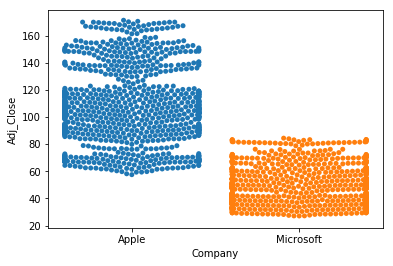

In [22]:
############### SWARM PLOT ##################
ax=sns.swarmplot(x="Company", y="Adj_Close", data=df)

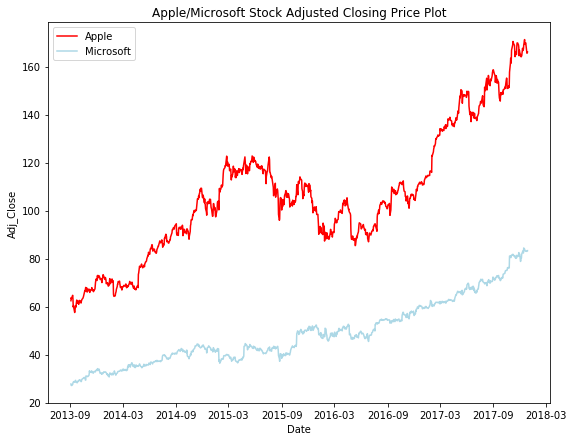

In [10]:
############### LINE GRAPH ##################
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import ttest_ind
from sklearn import linear_model

#Making a scatter plot for Apple and Microsoft Stock Data
APLE = df[df['Company']=='Apple']
MSFT = df[df['Company']=='Microsoft']
apple_date_time = pd.read_csv('EOD-AAPL.csv', parse_dates=['Date'], index_col=['Date'])
msft_date_time = pd.read_csv('EOD-MSFT.csv', parse_dates=['Date'], index_col=['Date'])

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(apple_date_time.index.values, APLE['Adj_Close'], c='red', label='Apple')
ax.plot(msft_date_time.index.values, MSFT['Adj_Close'], c='lightblue', label='Microsoft')
ax.set(xlabel='Date',
       ylabel='Adj_Close',
       title='Apple/Microsoft Stock Adjusted Closing Price Plot')
plt.legend()
plt.show()

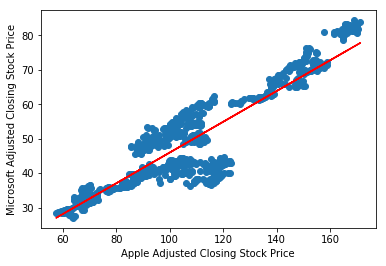

In [11]:
############### REGRESSION PLOT ##################
#Making a regression plot for Apple/Microsoft Stock Data
x = APLE['Adj_Close']
y = MSFT['Adj_Close']
stats = linregress(x, y,)
m = stats.slope
b = stats.intercept
plt.scatter(x, y)
plt.plot(x, m * x + b, color='Red')
plt.xlabel('Apple Adjusted Closing Stock Price')
plt.ylabel('Microsoft Adjusted Closing Stock Price')
plt.show()

In [14]:
############### REGRESSION TEST(1) ##################
import statsmodels.api as smf
# Regression Summary thru Stats model
x = APLE['Adj_Close']
y = MSFT['Adj_Close']
x = smf.add_constant(x)
results = smf.OLS(y, x).fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:              Adj_Close   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     3912.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:33:37   Log-Likelihood:                -3551.6
No. Observations:                1090   AIC:                             7107.
Df Residuals:                    1088   BIC:                             7117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2688      0.784      1.618      0.1

In [15]:
############### REGRESSION TEST(2) ##################
#Regression Summary thru Sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1.2688443390109256
Coefficients: 
 [0.         0.44721475]


In [23]:
############### T-TEST ##################
from scipy import stats
df_a = df[ df['Company'] == 'Apple']['Adj_Close']
df_m = df[ df['Company'] == 'Microsoft']['Adj_Close']
stats.ttest_ind(df_a, df_m)
# t-test result is statsly significant: Adj_Close bw 2 companies are different.

Ttest_indResult(statistic=63.51947460116789, pvalue=0.0)